# WORTH OF CAR

How Much is Your Car Worth?
Data about the retail price of 2005 General Motors cars can be found in car_data.csv.

The columns are:

Price: suggested retail price of the used 2005 GM car in excellent condition.
Mileage: number of miles the car has been driven
Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D
Type: body type such as sedan, coupe, etc.
Cylinder: number of cylinders in the engine
Liter: a more specific measure of engine size
Doors: number of doors
Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
Leather: indicator variable representing whether the car has leather seats (1 = leather)


Tasks, Part 1
Find the linear regression equation for mileage vs price.
Chart the original data and the equation on the chart.
Find the equation's  𝑅2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

Tasks, Part 2
Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
Find the equation's  𝑅2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
Find the combination of the factors that is the best predictor for price.


Tasks, Hard Mode
Research dummy variables in scikit-learn to see how to use the make, model, and body type.
Find the best combination of factors to predict price.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [29]:
df = pd.read_csv("car_data.csv")

In [30]:
df.shape

(804, 12)

In [31]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [32]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [33]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [34]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

Tasks, Part 1 Find the linear regression equation for mileage vs price. Chart the original data and the equation on the chart. Find the equation's 𝑅2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

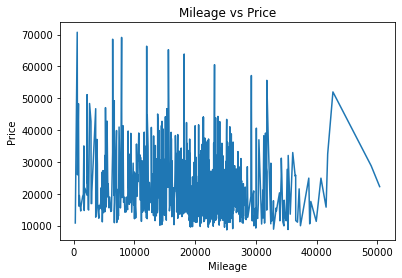

In [35]:
df.groupby('Mileage')['Price'].mean().plot()
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [36]:
df[['Mileage','Price']].corr()

,Mileage,Price
Mileage,1.000000,-0.143051
Price,-0.143051,1.000000


In [39]:
X = df[['Mileage']].values
y = df['Price'].values

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=888)

In [41]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [42]:
print(regressor.coef_) #m

[-0.22000094]


In [43]:
print(regressor.intercept_) #c

25678.969483822693


In [ ]:
# y_pred = -0.22(Mileage) + 25678.96

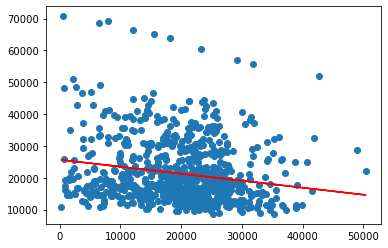

In [44]:
plt.scatter(X, y)
plt.plot(X, regressor.predict(X), color = 'red')
plt.show()

In [45]:
y_pred = regressor.predict(X_test)
y_pred

array([21013.18956015, 20766.78850798, 20787.0285944 , 20174.545979  ,
       23208.57893484, 20924.52918156, 23658.26085505, 23062.71831199,
       22435.49563364, 20571.20767281, 21756.35273358, 18815.60017607,
       21918.27342501, 21808.27295529, 25485.14865617, 20252.6463125 ,
       21868.77321364, 19937.60496722, 21196.67034364, 19742.02413206,
       22537.79607048, 20424.02704433, 19886.78475021, 23243.77908515,
       22149.93441424, 19963.56507808, 20116.24573005, 18139.75729011,
       20054.86546794, 23137.07862952, 24373.0439073 , 21908.59338368,
       21518.75171899, 19632.46366422, 17636.39514067, 20676.14812093,
       17833.29598147, 25020.72667301, 20164.64593673, 20745.88841873,
       21391.15117411, 19927.48492401, 21993.07374442, 17841.65601716,
       20021.20532421, 18990.06092105, 20236.14624204, 20950.70929335,
       22141.79437948, 21649.65227795, 20667.56808429, 19690.98391411,
       19695.16393196, 18783.26003797, 23725.36114158, 21747.55269601,
      

In [46]:
from sklearn import metrics
print('R2_SCORE is', metrics.r2_score(y_test, y_pred))

R2_SCORE is -0.046128757654139596


Since the R2 value is less than 0. We drop this model. There is very less correlation between Mileage and Price. 

Part 2 Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation. Find the equation's 𝑅2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.) Find the combination of the factors that is the best predictor for price

In [47]:
X = df[['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']].values
y = df['Price'].values

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8888)

In [49]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [50]:
coef_df = pd.DataFrame(regressor.coef_,['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather'], columns=['Coefficient'])
y_pred = regressor.predict(X_test)
coef_df

,Coefficient
Mileage,-0.163350
Cylinder,4561.244501
Liter,-1367.511325
Doors,-1714.090077
Cruise,5982.820432
Sound,-1709.860714
Leather,3631.102463


In [51]:
regressor.intercept_

4789.995478967496

In [24]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.2080445722286911


Tasks, Hard Mode Research dummy variables in scikit-learn to see how to use the make, model, and body type. Find the best combination of factors to predict price.